In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode

init_notebook_mode(connected=True)
from wordcloud import WordCloud, STOPWORDS
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv("./sample_data/world_population_data.csv")

df.head(n=5).style.set_properties(
    **{"background-color": "#5975A4", "color": "white", "border": "1.5px  solid black"}
)


,rank,cca3,country,continent,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²),growth rate,world percentage
0,1,IND,India,Asia,1428627663,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590.000000,481,0.81%,17.85%
1,2,CHN,China,Asia,1425671352,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961.000000,151,-0.02%,17.81%
2,3,USA,United States,North America,339996563,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610.000000,37,0.50%,4.25%
3,4,IDN,Indonesia,Asia,277534122,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569.000000,148,0.74%,3.47%
4,5,PAK,Pakistan,Asia,240485658,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912.000000,312,1.98%,3.00%


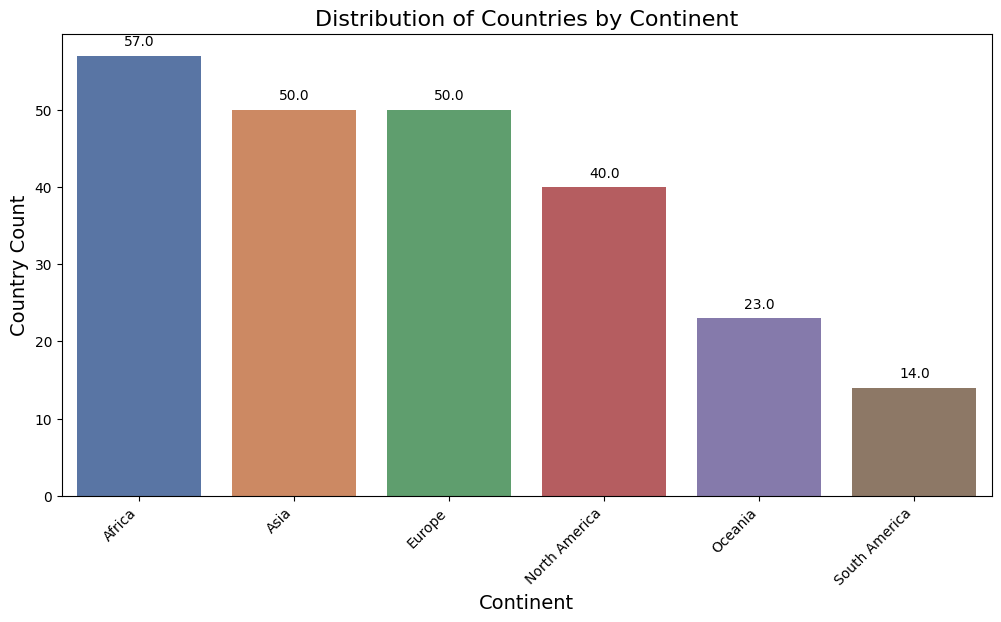

In [4]:
# Set a color palette for the countplot
palette = "deep"

# Countplot of population distribution by continent
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='continent', data=df, order=df['continent'].value_counts().index, palette=palette)

# Display values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Title and labels
plt.title('Distribution of Countries by Continent', fontsize=16)
plt.xlabel('Continent', fontsize=14)
plt.ylabel('Country Count', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Remove grid lines
ax.yaxis.grid(False)

# Show the plot
plt.show()

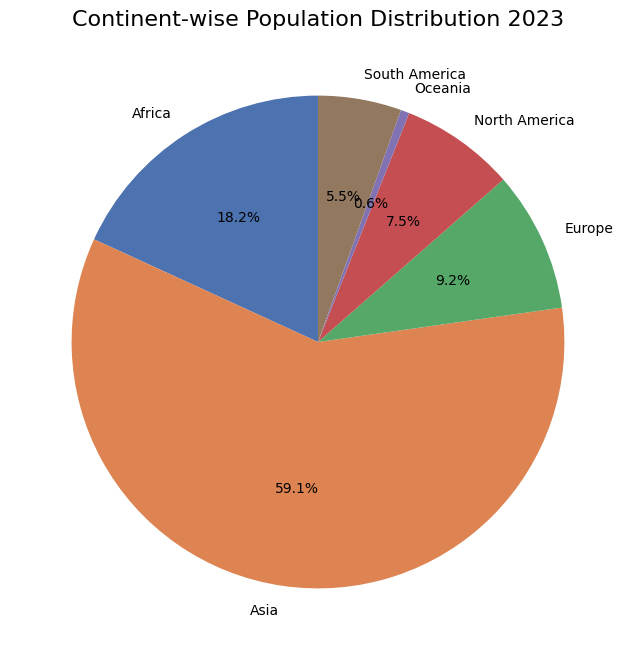

In [5]:
# Set a color palette for the pie chart
colors = sns.color_palette('deep')

# Calculate total population for each continent
continent_population = df.groupby('continent')['2023 population'].sum()

# Create a full pie chart with the custom palette
plt.figure(figsize=(10, 8))
plt.pie(continent_population, labels=continent_population.index, autopct='%1.1f%%', colors=colors, startangle=90)

# Title
plt.title('Continent-wise Population Distribution 2023', fontsize=16)

# Show the plot
plt.show()

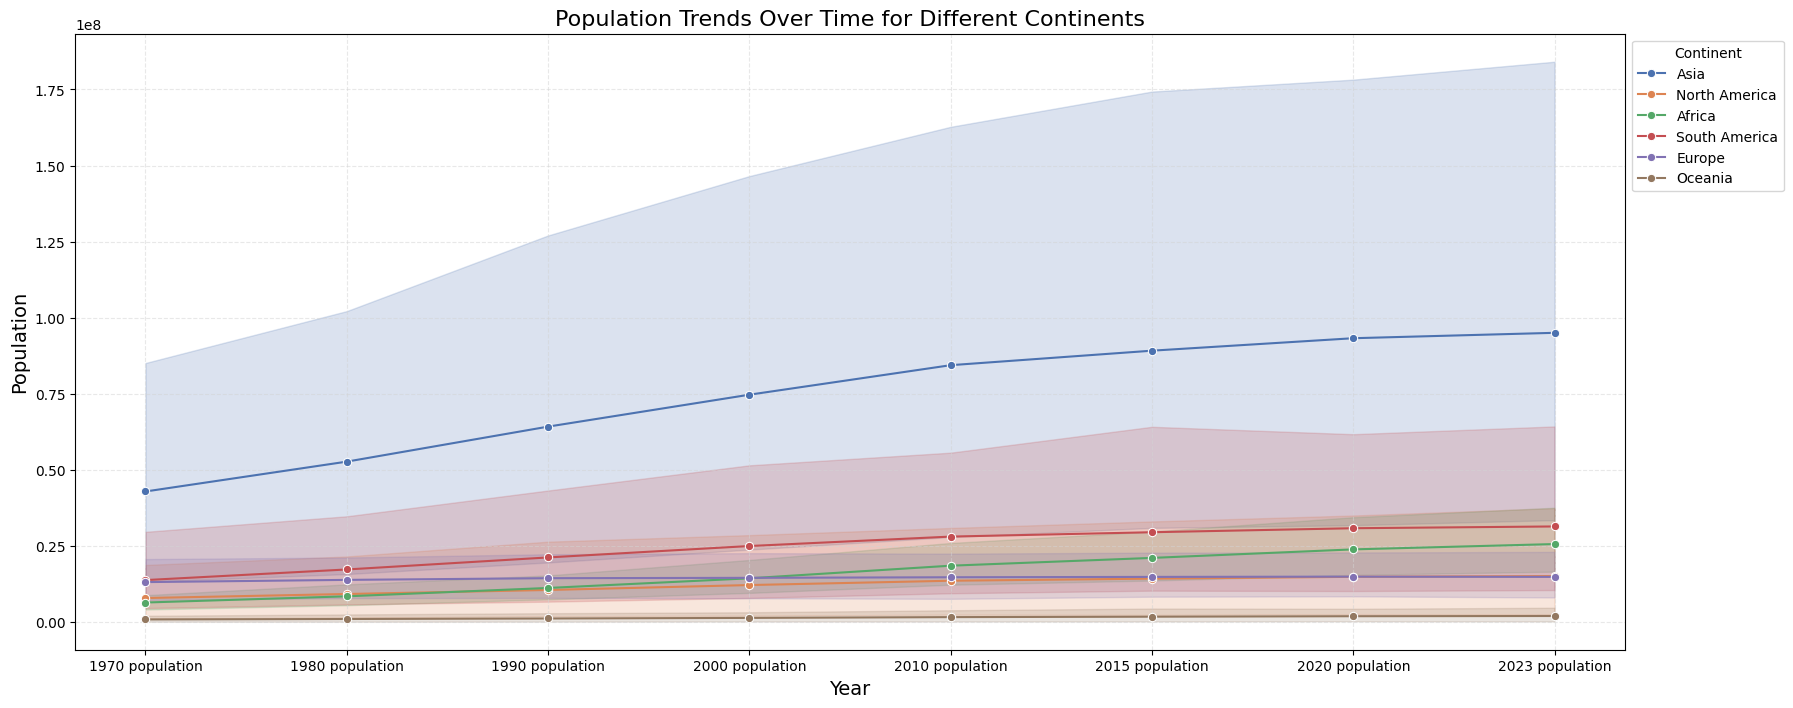

In [6]:
# Select the continents of interest
continents_of_interest = ['Asia', 'Africa', 'Europe', 'North America', 'South America', 'Oceania']

# Filter the DataFrame to include only the specified continents
selected_continents_df = df[df['continent'].isin(continents_of_interest)]

# Melt the DataFrame to make it suitable for seaborn lineplot
melted_df_continents = selected_continents_df.melt(id_vars=['continent'], value_vars=['1970 population','1980 population','1990 population','2000 population', '2010 population', '2015 population', '2020 population', '2023 population'])

# Set color palette for the line plot
palette = "deep"

# Create a line plot using seaborn
plt.figure(figsize=(20, 8))
ax = sns.lineplot(x='variable', y='value', hue='continent', data=melted_df_continents, palette=palette, marker='o')

# Title and labels
plt.title('Population Trends Over Time for Different Continents', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Population', fontsize=14)

# Add legend
plt.legend(title='Continent', loc='upper left', bbox_to_anchor=(1, 1))


# Add grid lines for better visibility
plt.grid(axis='both', linestyle='--', alpha=0.5, color='lightgray')

# Show the plot
plt.show()

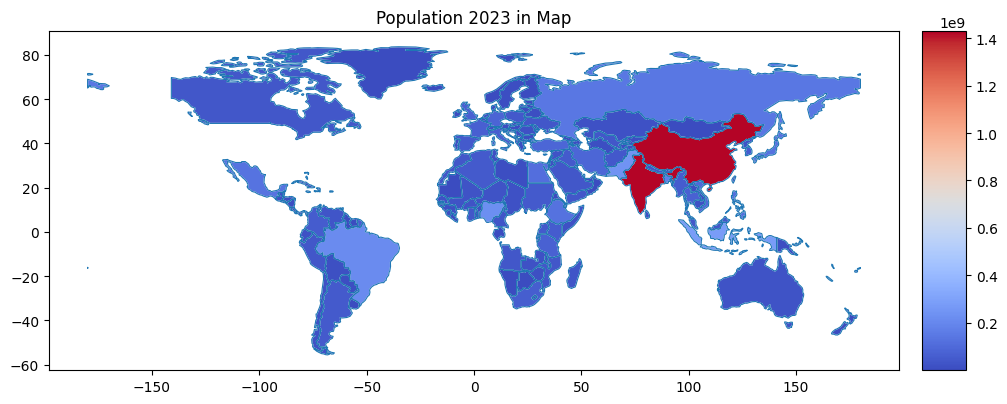

In [10]:
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world.merge(df[['country', '2023 population']], left_on='name', right_on='country')
norm = Normalize(vmin=world['2023 population'].min(), vmax=world['2023 population'].max())

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world.boundary.plot(ax=ax, linewidth=0.8)
world.plot(column='2023 population', ax=ax, legend=True, cax=cax, cmap='coolwarm', linewidth=0.8, edgecolor='1.0', norm=norm)

ax.set_title('Population 2023 in Map')

plt.show()